In [248]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import re

In [249]:
dfTrain= pd.read_csv('Train.csv',parse_dates=['date'])
dfTest = pd.read_csv('Test.csv',parse_dates=['date'])
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [250]:
dfTrain.drop_duplicates()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877
...,...,...,...,...,...,...,...,...,...
5424,b6aa30da97fa3c95989c47ccf5ab4e9f,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,2019-11-20,0,0,0,20.601
5425,58b62e9fa867d622662b8a4096fdc3f0,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,2019-09-26,0,0,0,1537.666
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,2019-08-13,0,0,0,22.711
5427,ac6579972e89dfc78d3ee95d15764681,913,NaN,Unknown - MobileWeb,2019-06-18,0,0,0,20.844


In [251]:
dfTrain.tail()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
5424,b6aa30da97fa3c95989c47ccf5ab4e9f,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,2019-11-20,0,0,0,20.601
5425,58b62e9fa867d622662b8a4096fdc3f0,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,2019-09-26,0,0,0,1537.666
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,2019-08-13,0,0,0,22.711
5427,ac6579972e89dfc78d3ee95d15764681,913,NaN,Unknown - MobileWeb,2019-06-18,0,0,0,20.844
5428,bd8f8239b827fc29d4e1bec91bd499b7,1254,Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_4 like ...,iPhone - Web,2019-10-21,0,0,0,20.504


In [252]:
#checking for negative, min/max ,std and values distribution
dfTrain.describe()

,session_number,purchased,added_in_cart,checked_out,time_spent
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,1072.835329,0.159145,0.162092,0.017499,663.194292
std,1436.351474,0.365845,0.368570,0.131132,1713.671664
min,11.000000,0.000000,0.000000,0.000000,14.400000
25%,121.000000,0.000000,0.000000,0.000000,22.699000
50%,517.000000,0.000000,0.000000,0.000000,98.312000
75%,1397.000000,0.000000,0.000000,0.000000,600.463000
max,7722.000000,1.000000,1.000000,1.000000,38494.025000


In [253]:
dfTrain.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [254]:
dfTest.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [255]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_id      5429 non-null   object        
 1   session_number  5429 non-null   int64         
 2   client_agent    5269 non-null   object        
 3   device_details  5429 non-null   object        
 4   date            5429 non-null   datetime64[ns]
 5   purchased       5429 non-null   int64         
 6   added_in_cart   5429 non-null   int64         
 7   checked_out     5429 non-null   int64         
 8   time_spent      5429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 381.9+ KB


In [256]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_id      2327 non-null   object        
 1   session_number  2327 non-null   int64         
 2   client_agent    2268 non-null   object        
 3   device_details  2327 non-null   object        
 4   date            2327 non-null   datetime64[ns]
 5   purchased       2327 non-null   int64         
 6   added_in_cart   2327 non-null   int64         
 7   checked_out     2327 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 145.6+ KB


In [257]:
dfTrain.shape, dfTest.shape

((5429, 9), (2327, 8))

In [258]:
if dfTrain.session_id.nunique() == dfTrain.shape[0]:
    print("session_id is unique")
dfTrain.session_id.nunique()   

session_id is unique


5429

In [259]:
if dfTrain.session_number.nunique() == dfTrain.shape[0]:
    print("session_number is unique")
dfTrain.session_number.nunique()

610

In [260]:
dfTrain.client_agent.nunique()

698

In [261]:
dfTrain.client_agent.value_counts().iloc[:10]

Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201    209
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                       163
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                              148
Product/4.2.0 iPhone/7.1.1                                                                                        146
Product/4.7.0 iPhone/8.1.2                                                                                        144
Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Mobile/12B411       114
Mozilla/5.0 (iPhone; CPU iPhone OS 8_1_2 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Mobile/12B440      86
Product/6.0 iPhone/8.1.3                                                                                           82
Product/4.4.1 iPhone/8.1                                

In [262]:
# dfTrain['session_number'] =dfTrain['session_number'].map(lambda x: x/11)
# dfTest['session_number'] =dfTest['session_number'].map(lambda x: x/11)

In [263]:
# dfTrain['Device_org'] = dfTrain["device_details"].str.split('-').str[0]
# dfTrain['Platform_org'] = dfTrain["device_details"].str.split('-').str[1]

# dfTest['Device_org'] = dfTest["device_details"].str.split('-').str[0]
# dfTest['Platform_org'] = dfTest["device_details"].str.split('-').str[1]

In [264]:
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [19]:
# #after inspecing the client_agent and device details we can see that more data can be extracted for many rows
# #as the device details does not provide much details on device platform we can extract it through the client_agent details
# def split_client_agent(df):
# #     df['Platform_org'] = ["nan" for i in range(len(df))]
# #     df["Device_org"] = ["nan" for i in range(len(df))]
# #     for i,text in enumerate(df['device_details']):
# #         df['Device_org'].iloc[i],df['Platform_org'].iloc[i] = re.split(" - ", text)
        
#     df["Platform"] = ["nan" for i in range(len(df))]
#     df["Device"] = ["nan" for i in range(len(df))]
    
#     app_count=0
#     mozilla_count=0
#     safari_count=0
#     chrome_count=0
#     firefox_count=0
#     opera_count=0
    
#     iphone_count=0
#     ipad_count=0
#     windows_count=0
#     android_count=0
#     linux_count=0
#     mac_count=0
#     apple_device_count=0
#     count=0
    
#     #iterating through the dataframe and adding counts for each encountered instance and adding found instance to new column
#     for i,text in enumerate(df["client_agent"]):
#         if type(text) == str:
#             count+=1
            
#             if 'product' in text.lower():
#                 app_count+=1
#                 df["Platform"].iloc[i]='app'
            
#             elif 'mozilla' in text.lower():
#                 mozilla_count+=1
#                 df['Platform'].iloc[i]='mozilla'
            
#             elif 'chrome' in text.lower():
#                 chrome_count+=1
#                 df['Platform'].iloc[i]='chrome'
            
#             elif 'safari' in text.lower():
#                 safari_count+=1
#                 df['Platform'].iloc[i]='safari'
            
#             elif 'firefox' in text.lower():
#                 firefox_count+=1
#                 df['Platform'].iloc[i]='firefox'   
            
#             elif 'opera' in text.lower():
#                 opera_count+=1
#                 df['Platform'].iloc[i]='opera'
                
            
            
#             if "windows" in text.lower():
#                 windows_count+=1
#                 df["Device"].iloc[i] = "windows"

#             elif "iphone" in text.lower():
#                 iphone_count+=1
#                 df["Device"].iloc[i] = "iphone"

#             elif "ipad" in text.lower():
#                 ipad_count+=1
#                 df["Device"].iloc[i] = "ipad"

#             elif "android" in text.lower():
#                 android_count+=1
#                 df["Device"].iloc[i] = "android"

#             elif "macintosh" in text.lower():
#                 mac_count+=1        
#                 df["Device"].iloc[i] = "macintosh"
                
#             elif "linux" in text.lower():
#                 linux_count+=1        
#                 df["Device"].iloc[i] = "linux"
                
#             elif 'cfnetwork' in text.lower():
#                 apple_device_count+=1
#                 df['Device'].iloc[i]='apple device'
                
#     print("Total Count:", count)
#     print("**"*20)
#     print("app_count:", app_count)
#     print("mozilla_count:", mozilla_count)
#     print("chrome_count:", chrome_count)
#     print("safari_count:", safari_count)   
#     print("firefox_count:", firefox_count)
#     print("opera_count:", opera_count)
#     print("**"*20)
#     print("windows_count:", windows_count)    
#     print("iphone_count:", iphone_count)
#     print("ipad_count:", ipad_count)
#     print("android_count:", android_count)    
#     print("mac_count:", mac_count)
#     print("linux_count:", linux_count)
#     print("apple_device_count:", apple_device_count)
    
#     return df

In [20]:
# dfTrain =split_client_agent(dfTrain)
# dfTrain.head()

e:\pythonforselenium\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Total Count: 5269
****************************************
app_count: 2076
mozilla_count: 3153
chrome_count: 0
safari_count: 1
firefox_count: 0
opera_count: 6
****************************************
windows_count: 1130
iphone_count: 2459
ipad_count: 364
android_count: 490
mac_count: 729
linux_count: 6
apple_device_count: 58


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,Device_org,Platform_org,Platform,Device
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Desktop,Chrome,mozilla,windows
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,iPhone,iOS,app,iphone
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,iPhone,MobileWeb,mozilla,iphone
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,Desktop,IE,mozilla,windows
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,iPhone,Web,mozilla,iphone


In [21]:
# dfTrain.to_csv('Train_client.csv')

In [124]:
# dfTrain.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
Device_org          0
Platform_org        0
dtype: int64

In [125]:
# dfTest.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
Device_org         0
Platform_org       0
dtype: int64

In [24]:
# dfTest =split_client_agent(dfTest)
# dfTest.head()

e:\pythonforselenium\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Total Count: 2268
****************************************
app_count: 863
mozilla_count: 1382
chrome_count: 0
safari_count: 0
firefox_count: 0
opera_count: 4
****************************************
windows_count: 526
iphone_count: 1048
ipad_count: 166
android_count: 178
mac_count: 299
linux_count: 2
apple_device_count: 28


,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,Device_org,Platform_org,Platform,Device
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0,Desktop,IE,mozilla,windows
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0,Android Phone,Android,app,android
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0,iPhone,iOS,app,iphone
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0,Desktop,IE,mozilla,windows
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0,Desktop,Chrome,mozilla,windows


In [145]:
# dfTrain.replace("Typhoeus - https://github.com/typhoeus/typhoeus","nan",inplace=True)
# dfTest.replace("Typhoeus - https://github.com/typhoeus/typhoeus","nan",inplace=True)

In [127]:
# dfTrain.replace("nan", np.nan, inplace=True)
# dfTest.replace('nan',np.nan, inplace=True)

In [27]:
# dfTrain.fillna(method="ffill", inplace=True)
# dfTest.fillna(method="ffill", inplace=True)

In [265]:
dfTrain.device_details.value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [266]:
dfTrain.device_details.nunique()

17

In [267]:
dfTrain.date.nunique()

342

0    4565
1     864
Name: purchased, dtype: int64

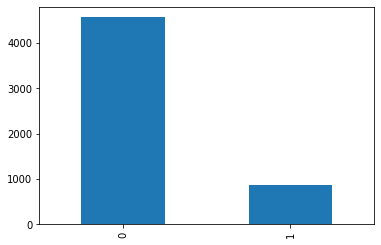

In [268]:
dfTrain.purchased.value_counts().plot(kind='bar')
dfTrain.purchased.value_counts()

0    4549
1     880
Name: added_in_cart, dtype: int64

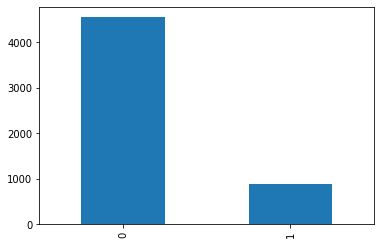

In [269]:
dfTrain.added_in_cart.value_counts().plot(kind='bar')
dfTrain.added_in_cart.value_counts()

0    5334
1      95
Name: checked_out, dtype: int64

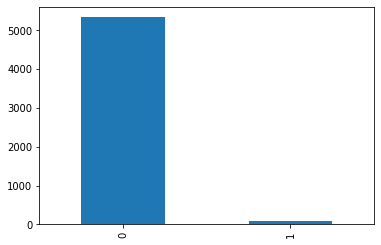

In [270]:
dfTrain.checked_out.value_counts().plot(kind='bar')
dfTrain.checked_out.value_counts()

In [271]:
dfTrain.corr()

,session_number,purchased,added_in_cart,checked_out,time_spent
session_number,1.000000,-0.213733,0.003013,-0.054500,0.078437
purchased,-0.213733,1.000000,0.045022,0.168513,0.200762
added_in_cart,0.003013,0.045022,1.000000,0.215754,0.209807
checked_out,-0.054500,0.168513,0.215754,1.000000,0.157765
time_spent,0.078437,0.200762,0.209807,0.157765,1.000000


In [272]:
skew(dfTrain['time_spent'])

8.035340699877555

In [273]:
skew(np.log1p(dfTrain['time_spent']))

0.5047400928429242

<AxesSubplot:xlabel='time_spent', ylabel='Density'>

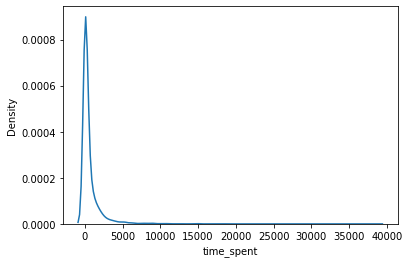

In [274]:
sns.kdeplot(dfTrain['time_spent'])

e:\pythonforselenium\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


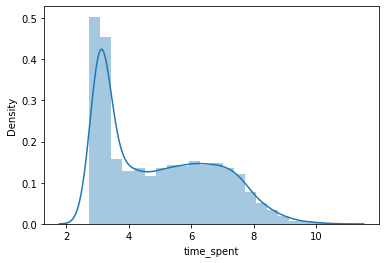

In [275]:
sns.distplot(np.log1p(dfTrain['time_spent']))
plt.show()

e:\pythonforselenium\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


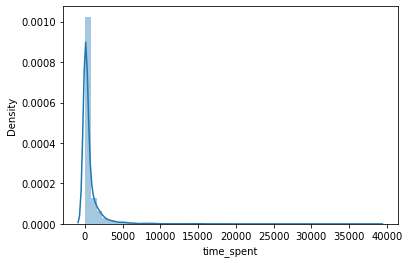

In [276]:
sns.distplot(dfTrain['time_spent'])
plt.show()

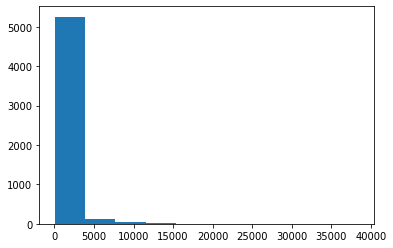

In [277]:
plt.hist(dfTrain['time_spent'])
plt.show()

In [278]:
dfTrain.groupby('session_number')['time_spent'].mean()

session_number
11      494.134828
22      737.616760
33      913.697803
44      606.066594
55      476.672914
           ...    
7678     22.437000
7689    169.578000
7700     31.313000
7711     20.191000
7722    167.263000
Name: time_spent, Length: 610, dtype: float64

In [279]:
#nothing to infer from session_id column
dfTrain['session_id'].str[:2].nunique()

256

In [280]:
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [281]:
dfTrain['session_id'].str[:4].nunique()

5206

In [282]:
dfTrain['session_id'].str[:6].nunique()

5429

In [283]:
# dfTrain = dfTrain.fillna('unknown')
# dfTest = dfTest.fillna('unknown')

In [284]:
# dfTrain=dfTrain.replace('-unknown-','unknown')
# dfTest=dfTest.replace('-unknown-','unknown')

In [285]:
# since there is a category called '-unknown-' already avaialable for unknown values replaced missing values with -unknown-
dfTrain.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [286]:
dfTest.isnull().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64

In [287]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [288]:
# for column in ['Platform_org','Device_org','Platform','Device']:
#     dfTrain[column]=le.fit_transform(dfTrain[column])
#     dfTest[column] = le.fit_transform(dfTest[column])
# dfTrain.head()

In [289]:
for column in ['device_details']:
    dfTrain[column]=le.fit_transform(dfTrain[column])
    dfTest[column] = le.fit_transform(dfTest[column])
dfTrain.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,16,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,14,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,8,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,15,2019-09-10,0,0,0,1164.877


In [290]:
dfTest.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,7,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,0,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,15,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,7,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,5,2020-01-29,0,0,0


In [52]:
# dfTrain= dfTrain.drop(['session_id','client_agent','device_details'], axis=1)
# dfTest = dfTest.drop(['session_id','client_agent','device_details'],axis=1)

In [291]:
dfTrain= dfTrain.drop(['session_id','client_agent'], axis=1)
dfTest = dfTest.drop(['session_id','client_agent'],axis=1)

In [292]:
dfTrain.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,715,6,2020-01-22,1,0,0,236.886
1,55,16,2020-02-27,1,0,0,1277.455
2,11,14,2019-08-01,0,0,0,21.704
3,2794,8,2019-12-30,0,1,0,455.201
4,3674,15,2019-09-10,0,0,0,1164.877


In [293]:
dfTest.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out
0,99,7,2020-01-07,1,0,0
1,935,0,2020-02-13,0,0,0
2,902,15,2019-10-14,1,0,0
3,3223,7,2020-01-26,0,0,0
4,231,5,2020-01-29,0,0,0


In [296]:
# # convert date column to unique value subtracting the max value 
dfTrain['datepurch']=dfTrain['date'].max()-dfTrain['date']
dfTest['datepurch']=dfTest['date'].max()-dfTest['date']
dfTrain.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out,time_spent,datepurch
0,715,6,2020-01-22,1,0,0,236.886,92 days
1,55,16,2020-02-27,1,0,0,1277.455,56 days
2,11,14,2019-08-01,0,0,0,21.704,266 days
3,2794,8,2019-12-30,0,1,0,455.201,115 days
4,3674,15,2019-09-10,0,0,0,1164.877,226 days


In [297]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   session_number  5429 non-null   int64          
 1   device_details  5429 non-null   int32          
 2   date            5429 non-null   datetime64[ns] 
 3   purchased       5429 non-null   int64          
 4   added_in_cart   5429 non-null   int64          
 5   checked_out     5429 non-null   int64          
 6   time_spent      5429 non-null   float64        
 7   datepurch       5429 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), timedelta64[ns](1)
memory usage: 318.2 KB


In [298]:
dfTrain['datepurch']= dfTrain['datepurch'].astype(str)
dfTest['datepurch']= dfTest['datepurch'].astype(str)

In [299]:
dfTrain['datepurch']= dfTrain['datepurch'].str.split(' ').str[0]
dfTest['datepurch']= dfTest['datepurch'].str.split(' ').str[0]

In [300]:
dfTrain['datepurch']= dfTrain['datepurch'].astype(int)
dfTest['datepurch']= dfTest['datepurch'].astype(int)

In [301]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_number  5429 non-null   int64         
 1   device_details  5429 non-null   int32         
 2   date            5429 non-null   datetime64[ns]
 3   purchased       5429 non-null   int64         
 4   added_in_cart   5429 non-null   int64         
 5   checked_out     5429 non-null   int64         
 6   time_spent      5429 non-null   float64       
 7   datepurch       5429 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4)
memory usage: 297.0 KB


In [302]:
dfTrain=dfTrain.drop('date',axis=1)
dfTest=dfTest.drop('date',axis=1)
dfTrain.head()

,session_number,device_details,purchased,added_in_cart,checked_out,time_spent,datepurch
0,715,6,1,0,0,236.886,92
1,55,16,1,0,0,1277.455,56
2,11,14,0,0,0,21.704,266
3,2794,8,0,1,0,455.201,115
4,3674,15,0,0,0,1164.877,226


In [303]:
dfTest.head()

,session_number,device_details,purchased,added_in_cart,checked_out,datepurch
0,99,7,1,0,0,103
1,935,0,0,0,0,66
2,902,15,1,0,0,188
3,3223,7,0,0,0,84
4,231,5,0,0,0,81


In [304]:
dfTest.shape

(2327, 6)

In [305]:
X=dfTrain.drop('time_spent',axis=1)
y=dfTrain['time_spent']

In [306]:
X.head()

,session_number,device_details,purchased,added_in_cart,checked_out,datepurch
0,715,6,1,0,0,92
1,55,16,1,0,0,56
2,11,14,0,0,0,266
3,2794,8,0,1,0,115
4,3674,15,0,0,0,226


# Linear Regression

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [308]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=2)

In [310]:
model=LinearRegression()
model.fit(X,y)
y_pred=abs(model.predict(X_test))

In [311]:
y_pred

array([1.17308890e+03, 1.71769688e+02, 8.89612978e+02, 1.11256037e+03,
       4.47937302e+02, 1.28109221e+03, 1.14291093e+03, 3.75097416e+02,
       1.29470042e+03, 1.81652236e+02, 2.51809790e+02, 4.04220073e+02,
       2.01306909e+03, 1.55206816e+02, 1.13180782e+03, 4.08282819e+02,
       1.31726681e+02, 1.38407182e+03, 3.01177448e+02, 2.60733082e+02,
       1.95529303e+02, 4.37690445e+02, 3.40233959e+03, 8.56037123e+02,
       4.71501589e+02, 4.04273047e+02, 1.17370554e+03, 1.46866984e+02,
       8.39574995e+02, 3.78659398e+02, 2.01566240e+02, 1.28928345e+03,
       4.17229657e+02, 3.47275448e+02, 3.79452487e+02, 1.15722102e+03,
       3.28379575e+02, 1.35330349e+03, 1.31843661e+03, 3.44927595e+02,
       1.01379863e+02, 4.20129517e+02, 7.84288668e+01, 2.20018434e+03,
       3.37738876e+02, 1.61665186e+02, 8.50756118e+01, 1.62993571e+02,
       3.99871681e+02, 1.17935462e+03, 1.30170058e+02, 1.98475679e+03,
       4.82008521e+02, 3.53093903e+02, 1.08679847e+03, 3.45855281e+02,
      

In [312]:
# #validation test results 
# pred_submission=pd.DataFrame({'time_spent':y_pred})
# pred_submission.to_csv('pred_submission.csv',index=False)

In [313]:
from sklearn.metrics import mean_squared_log_error

In [314]:
msle= np.sqrt(mean_squared_log_error(y_test,y_pred))
msle

2.0733439465196417

In [315]:
y_pred_test=abs(model.predict(dfTest))

In [316]:
len(y_pred_test)

2327

In [317]:
# samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
# samplesubmission.to_csv('samplesubmissionLR.csv',index=False)

In [318]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# DecisionTree Regressor

In [319]:
modelDTR = DecisionTreeRegressor()

In [320]:
modelDTR.fit(X,y)

DecisionTreeRegressor()

In [321]:
y_pred_test=abs(modelDTR.predict(dfTest))

In [322]:
samplesubmissionDT = pd.DataFrame({'time_spent':y_pred_test})
samplesubmissionDT.to_csv('submissionDT.csv',index=False)

# Random Forest Regressor

In [323]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
modelRFR.fit(X, y)

RandomForestRegressor(random_state=0)

In [324]:
y_pred_test= abs(modelRFR.predict(dfTest))

In [325]:
samplesubmissionRF = pd.DataFrame({'time_spent':y_pred_test})
samplesubmissionRF.to_csv('SubmissionRF.csv',index=False)

# Gradient Boosting Regresssor

In [326]:
from sklearn.ensemble import GradientBoostingRegressor
modelGBR = GradientBoostingRegressor(random_state = 0)
modelGBR.fit(X, y)

GradientBoostingRegressor(random_state=0)

In [327]:
y_pred_test=abs(modelGBR.predict(dfTest))

In [328]:
samplesubmissionGB = pd.DataFrame({'time_spent':y_pred_test})
samplesubmissionGB.to_csv('SubmissionGB.csv',index=False)

# Support vector Regressor

In [329]:
from sklearn.svm import SVR
modelSVR = SVR(kernel = 'poly',degree=7)
modelSVR.fit(X, y)

SVR(degree=7, kernel='poly')

In [330]:
y_pred_test=abs(modelSVR.predict(dfTest))

In [331]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionSVR.csv',index=False)

<AxesSubplot:ylabel='Density'>

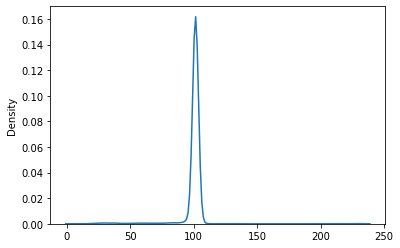

In [332]:
sns.kdeplot(y_pred_test)

# Support Vector Regressor with MinMaxScaler

In [ ]:
y=dfTrain['time_spent'].values

In [ ]:
y.shape

In [ ]:
y=y.reshape(-1,1)

In [ ]:
y.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2= StandardScaler()
scaler3 = StandardScaler()
train = scaler1.fit_transform(dfTrain.drop('time_spent',axis=1))
target =scaler2.fit_transform(y)
test =scaler3.fit_transform(dfTest)

In [ ]:
train_df=pd.DataFrame(train)
test_df =pd.DataFrame(test)
target_df =pd.DataFrame(target)

In [ ]:
test_df.shape

In [ ]:
train_df.shape

In [ ]:
target_df.shape

In [ ]:
train_df.columns =dfTrain.drop('time_spent',axis=1).columns
test_df.columns = dfTest.columns
target_df.columns =['time_spent']

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
target_df.head()

In [ ]:
modelSVR = SVR(kernel = 'poly')
modelSVR.fit(train_df, target_df)

In [ ]:
y_pred_test=abs(modelSVR.predict(test_df))

In [ ]:
y_pred_test_inv=scaler2.inverse_transform(y_pred_test)

In [ ]:
y_pred_test_inv_df=pd.DataFrame({'time_spent':y_pred_test_inv})

In [ ]:
y_pred_test_inv_df.shape

In [ ]:
y_pred_test_inv_df.to_csv('submission.csv',index=False)

In [ ]:
train_df_2327.info()

In [ ]:
train_df_2327_inv=scaler1.inverse_transform(train_df_2327)

In [ ]:
train_df_2327_inv_df = pd.DataFrame(train_df_2327_inv)
train_df_2327_inv_df.columns =dfTrain.columns
train_df_2327_inv_df.head()

In [ ]:
samplesubmission = pd.DataFrame({'time_spent':train_df_2327_inv_df['time_spent']})
samplesubmission.to_csv('SubmissionSVRMinMaxScaler.csv',index=False)

# Model Fine Tuning to decrease RMSLE ,Score  is 1.81243 
a)SVR Model is robust to outliers, so even after treating outliers the result or score is the same.

In [ ]:
plt.scatter(X.index,y)
plt.show()

In [ ]:
iqr=dfTrain['time_spent'].quantile(0.75)-dfTrain['time_spent'].quantile(0.25)
upper_limit=dfTrain['time_spent'].quantile(0.75)+1.5*iqr
lower_limit=dfTrain['time_spent'].quantile(0.25)-1.5*iqr
print(upper_limit,lower_limit)

In [ ]:
dfTrain.loc[dfTrain['time_spent']>1467,'time_spent']=1467

In [ ]:
min(dfTrain['time_spent'])

In [ ]:
max(dfTrain['time_spent'])

In [ ]:
modelSVR.fit(X, dfTrain['time_spent'])

In [ ]:
y_pred_test=abs(modelSVR.predict(dfTest))

In [ ]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionSVROutlier.csv',index=False)

In [ ]:
dfTrain['time_spent']=y

In [ ]:
max(dfTrain['time_spent'])

# Model Fine Tuning to decrease RMSLE Score ,  score is 2.04125
  hyper parameter tuning to decrease RMSLE Error  with hyper parameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomSearchCV

In [ ]:
#param = [ {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ['auto','scale']}]

parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]

modelsvr = SVR()

grids = GridSearchCV(modelsvr,parameters,cv=5,verbose=3,n_jobs=-1)

grids.fit(X,y)
grids.best_params_

In [ ]:
# y_pred_test=abs(grids.predict(dfTest))

In [ ]:
# samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
# samplesubmission.to_csv('SubmissionSVRhypparameter.csv',index=False)

# TPOT Regresssor RMSLE Score is 2.22456

In [ ]:
!pip3 install TPOT

In [ ]:
# from tpot import TPOTRegressor

In [ ]:
tpot = TPOTRegressor(verbosity = 2,
                     generations=7,
                     population_size=100)

In [ ]:
tpot.fit(X, y)
tpot_pred = abs(tpot.predict(dfTest))
prin(tpot_pred)

In [ ]:
samplesubmission = pd.DataFrame({'time_spent':tpot_pred})
samplesubmission.to_csv('SubmissionTPOT.csv',index=False)

# Support Vector Regression with values:
    SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [93]:
modelSVRPoly = SVR(kernel='poly',degree=10)
           
modelSVRPoly.fit(X, y)

SVR(degree=10, kernel='poly')

In [96]:
y_pred_test=abs(modelSVR.predict(dfTest))

In [97]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionSVRpoly10.csv',index=False)

# Extra Tree Regressor , score 2.36594

In [99]:
from sklearn.ensemble import ExtraTreesRegressor
modelETR =ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X,y)

In [100]:
y_pred_test=abs(modelETR.predict(dfTest))

In [101]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionETR.csv',index=False)

# LightGBM

In [366]:
import lightgbm as ltb
from sklearn.datasets import make_regression

In [367]:
X, y = make_regression(n_samples=1000, n_features=6, n_informative=6, random_state=1)

In [368]:
modelLGBM = ltb.LGBMRegressor()

In [369]:
modelLGBM.fit(X, y)

LGBMRegressor()

In [370]:
y_pred_test=abs(modelLGBM.predict(dfTest))

In [371]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionLGBM.csv',index=False)

# KNN Regressor

In [372]:
#removed client_agent and label encoded device_details column with date modification code done 

In [373]:
X

array([[ 0.45132365,  0.34442933, -1.00159787, -0.08887207,  0.04896555,
         0.24765975],
       [ 0.91905857, -0.41681132,  1.56243179,  0.56134129,  0.52212638,
        -0.04413434],
       [-1.87316098, -0.03536792,  0.07638048, -1.30653407,  2.11060505,
         0.92061512],
       ...,
       [ 0.09441541, -1.83589904, -0.80194708, -1.77632334,  0.33902513,
        -1.45669029],
       [ 0.12837699,  0.96653925, -0.60460297,  1.30620607,  0.71304905,
         1.76041518],
       [ 1.68192066, -1.47825328,  0.90543379, -0.70570395, -0.81058849,
        -0.40813368]])

In [374]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

In [375]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=abs(model.predict(X_test)) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2642.7735812511237
RMSE value for k=  2 is: 2473.37664173574
RMSE value for k=  3 is: 2381.739208176913
RMSE value for k=  4 is: 2159.6521465319283
RMSE value for k=  5 is: 2156.3136229379147
RMSE value for k=  6 is: 2051.458756034224
RMSE value for k=  7 is: 1920.1198924058401
RMSE value for k=  8 is: 1903.2327029798353
RMSE value for k=  9 is: 1933.8799232401666
RMSE value for k=  10 is: 1924.8484298408914
RMSE value for k=  11 is: 1953.3926382421134
RMSE value for k=  12 is: 1967.011068864127
RMSE value for k=  13 is: 1983.1184003380667
RMSE value for k=  14 is: 1985.915879605476
RMSE value for k=  15 is: 2001.1558157212796
RMSE value for k=  16 is: 1993.2862827796425
RMSE value for k=  17 is: 1994.8037650997453
RMSE value for k=  18 is: 1994.1360489518954
RMSE value for k=  19 is: 1995.805304559501
RMSE value for k=  20 is: 1990.2675998314792


<AxesSubplot:>

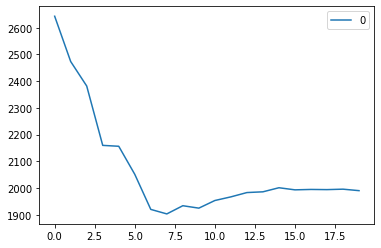

In [376]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [378]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(dfTrain.drop('time_spent',axis=1), dfTrain['time_spent'])  #fit the model
y_pred_test=abs(model.predict(dfTest))

In [379]:
samplesubmission = pd.DataFrame({'time_spent':y_pred_test})
samplesubmission.to_csv('SubmissionKNR.csv',index=False)

<AxesSubplot:ylabel='Density'>

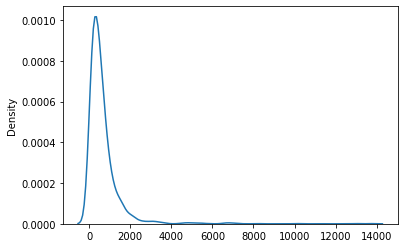

In [380]:
sns.kdeplot(y_pred_test)